In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

**In the excercise you can use a build in procedure for generating random numbers. Compare the results obtained in simulations with expected results. Use histograms (and tests).**

**1. Choose a value for the probability parameter p in the geometric distribution and simulate 10,000 outcomes. You can experiment with a small, moderate and large value if you like.**

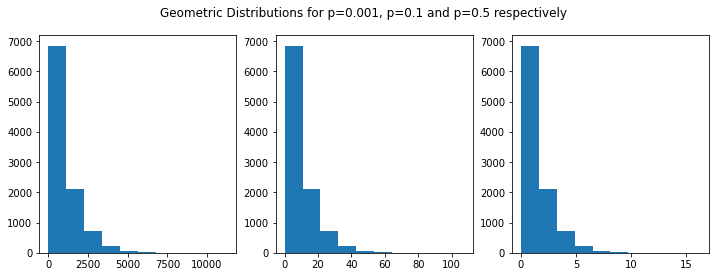

In [4]:
x = np.random.uniform(size=10000)
p = 0.001
samples1 = abs(np.log(x)/np.log(1-p))
p = 0.1
samples2 = abs(np.log(x)/np.log(1-p))
p = 0.5
samples3 = abs(np.log(x)/np.log(1-p))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Geometric Distributions for p=0.001, p=0.1 and p=0.5 respectively')
fig.set_size_inches(12, 4)
ax1.hist(samples1)
ax2.hist(samples2)
ax3.hist(samples3)
plt.savefig('ex2_geo_dists')

Below there's my own implementation of the geometric distribution:

**2. Simulate the 6 point distribution with**

**X -> 1 2 3 4 5 6**

**pi -> 7/48 5/48 1/8 1/16 1/4 5/16**

**(a) by applying a direct (crude) method**

10000
[0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]


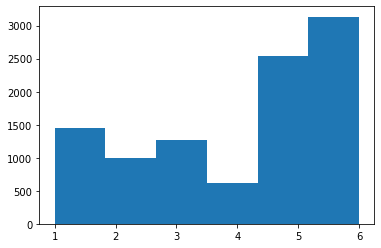

In [6]:
x = np.random.uniform(size=10000)
pi = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]

# direct (crude) method
y = []
for sp in x:
    val = 1
    cumpi = 0
    for i in range(len(pi)):
        cumpi += pi[i]
        if sp <= cumpi:
            y.append(val)
            break
        else:
            val += 1

plt.hist(y, bins=6)
plt.savefig('ex2_crude.png')
print(len(y))
print(pi)
y_crude = y

**(b) by using the the rejection method**

10000
[0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]


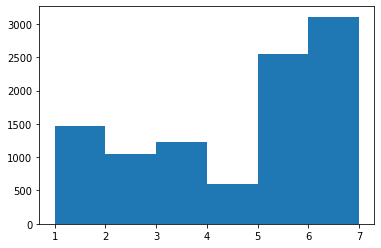

In [7]:
x = np.random.uniform(size=10000)
pi = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
k = len(pi)
c = max(x)

def identity(k, num):
    return abs(k * num) + 1

y = []
# simple rejection
for i in range(10000):
    go = True
    while go:
        I = identity(k, np.random.uniform())
        pI = pi[int(I-1)]
        if np.random.uniform() <= (pI / c):
            y.append(I)
            go = False

plt.hist(y, bins=6)
plt.savefig('ex2_rejection.png')
print(len(y))
print(pi)
y_rej = y

**(c) by using the Alias method**

In [8]:
x = np.random.uniform(size=10000)
pi = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
k = len(pi)
c = max(x)
#print(f'pi={pi}')

y = []
# Alias method
F = np.zeros(k)
L = np.zeros(k, dtype=int)
smaller = []
filled = []
larger = []
for idx, prob in enumerate(pi):
    F[idx] = k*prob
    if F[idx] < 1.0:
        smaller.append(idx)
    elif F[idx] == 1.0:
        filled.append(idx)
    else:
        larger.append(idx)

#print(f'L={L}')
#print(f'F={F}')

while len(smaller) > 0 and len(larger) > 0:
    i = smaller.pop(np.random.choice(len(smaller)))
    j = larger.pop(np.random.choice(len(larger)))

    L[i] = j
    F[j] = F[j] - (1-F[i])

    if F[j] < 1.0:
        smaller.append(j)
    elif F[j] == 1.0:
        filled.append(j)
    else:
        larger.append(j)

print(f'L={L}')
print(f'F={F}')

L=[5 4 4 5 5 0]
F=[0.875 0.625 0.75  0.375 0.875 1.   ]


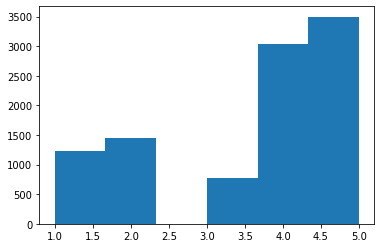

In [9]:
y = []
for i in range(10000):
    I = identity(k-1, np.random.uniform())
    if np.random.uniform() <= F[int(I)]:
        y.append(int(I))
    else:
        y.append(int(L[int(I)]))

plt.hist(y, bins=6)
plt.savefig('ex2_alias.png')
y_alias = y

**3. Compare the three different methods using adequate criteria,
then discuss the results.**

In [12]:
def chi_squared_test(x_obs, x_exp, k, x_lower=0, x_upper=1):
    x_obs, bins = np.histogram(x_obs, bins=k, range=(0, k-1))
    T = sum([(x_obs[i] - x_exp[i])**2/x_exp[i] for i in range(k)])
    chi_val = stats.chi2.ppf(0.95, k - 1)
    if stats.chi2.cdf(T, k - 1) < 0.95:
        print('H0 accepted: Similar distributions')
    else:
        print('H0 rejected: Distributions significantly different')

# Rejection method vs. crude method
print('\nRejection method vs. crude method using chi-square test:')
chi_squared_test(y_rej, y_crude, 6)

# Alias method vs. crude method
print('\nAlias method vs. crude method using chi-square test:')
chi_squared_test(y_alias, y_crude, 6)


Rejection method vs. crude method using chi-square test:
H0 rejected: Distributions significantly different

Alias method vs. crude method using chi-square test:
H0 rejected: Distributions significantly different


Although the first two methods look quite accurate by their respective distribution plots, when running the crude-method and the rejection one with a chi-square test (95% CI) they are very dissimilar.

The distribution from the Alias method looks much more different from the previous two, so it is not a surprise that when is compared against the crude-direct method the chi-square test (95% CI) tells us that they are very different.

**4. Give recommendations of how to choose the best suited
method in different settings, i.e., discuss the advantages and
drawbacks of each method. If time permits substantiate by
running experiments.**

It's easy to check that the direct-crude and the rejection methods are very precise when plotting their respective distributions. The Alias method is much less precise for this concrete case because k=6 has a very low value (very few possibilities to 'fill each bin with content from others'). This last method has an important computational cost when generating the tables but then is quite fast compared to the other 2 methods (referring only to the loop implementation).